<a href="https://colab.research.google.com/github/241b286-Vijay/aps-lab/blob/main/Lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. Divide and Conquer (Sorting)

- **Created by Dr. Ajay

Write a python program to perform **Countingsort**.
* Statement:  Given a disordered list of repeated integers, rearrange the integers in natural order.
 Sample Input: [4,3,2,1,4,3,2,4,3,4]
 Sample Output: [1,2,2,3,3,3,4,4,4,4]

Time Complexity of Solution: Best Case O(n+k); Average Case O(n+k); Worst Case O(n+k), where n is the size of the input array and k means the values range from 0 to k.
- Approach:
Counting sort, like radix sort and bucket sort, is an integer based algorithm (i.e. the values of the input array are assumed to be integers). Hence counting sort is among the fastest sorting algorithms around, in theory. The  particular distinction for counting sort is that it creates a bucket for each value and keep a counter in each bucket. Then each time a value is encountered in the input collection, the appropriate counter is incremented. Because counting sort creates a bucket for each value, an imposing restriction is that the maximum value in the input array be known beforehand. Bucket sort uses a hash function to distribute values; counting sort, on the other hand, creates a counter for each value -- hence the name.
- Implementation notes:
1. Since the values range from 0 to k, create k+1 buckets.

2. To fill the buckets, iterate through the input list and
each time a value appears, increment the counter in its bucket.
3. Now fill the input list with the compressed data in the
buckets. Each bucket's key represents a value in the  array. So for each bucket, from smallest key to largest, add the index of the bucket to the input array and decrease the counter in said bucket by one; until the counter is zero.

Original Array: [4, 3, 2, 1, 4, 3, 2, 4, 3, 4]
Sorted Array: [1, 2, 2, 3, 3, 3, 4, 4, 4, 4]

Measuring running time for Counting Sort...
Array Size: 100, Time: 0.000065 seconds
Array Size: 500, Time: 0.000113 seconds
Array Size: 1000, Time: 0.000173 seconds
Array Size: 5000, Time: 0.000762 seconds
Array Size: 10000, Time: 0.001268 seconds
Array Size: 20000, Time: 0.002578 seconds
Array Size: 50000, Time: 0.006094 seconds


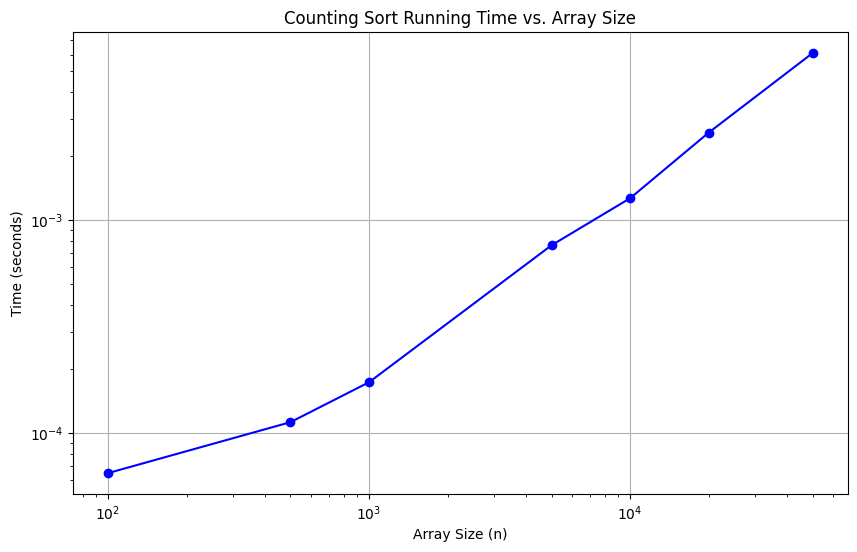

In [2]:
import time
import matplotlib.pyplot as plt

def countingSort(arr):
    if not arr:
        return []

    max_val = max(arr)
    count = [0] * (max_val + 1)

    for num in arr:
        count[num] += 1

    sorted_arr = []
    for i in range(max_val + 1):
        while count[i] > 0:
            sorted_arr.append(i)
            count[i] -= 1
    return sorted_arr

sample_input = [4, 3, 2, 1, 4, 3, 2, 4, 3, 4]
print(f"Original Array: {sample_input}")
sorted_sample = countingSort(sample_input)
print(f"Sorted Array: {sorted_sample}")

def measure_time(func, arr):
    start_time = time.time()
    func(arr)
    end_time = time.time()
    return end_time - start_time

def generate_test_array(size, max_val):
    import random
    return [random.randint(0, max_val) for _ in range(size)]

sizes = [100, 500, 1000, 5000, 10000, 20000, 50000]
max_k_value = 1000
times = []

print("\nMeasuring running time for Counting Sort...")
for size in sizes:
    test_arr = generate_test_array(size, max_k_value)
    time_taken = measure_time(countingSort, test_arr)
    times.append(time_taken)
    print(f"Array Size: {size}, Time: {time_taken:.6f} seconds")


plt.figure(figsize=(10, 6))
plt.plot(sizes, times, marker='o', linestyle='-', color='b')
plt.title('Counting Sort Running Time vs. Array Size')
plt.xlabel('Array Size (n)')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.show()


 - *Bucketsort*
Statement:
Given a disordered list of integers, rearrange them in natural order.
 Sample Input: [8,5,3,1,9,6,0,7,4,2,5]
 Sample Output: [0,1,2,3,4,5,6,7,8,9,5]
Time Complexity of Solution:
Best Case O(n); Average Case O(n); Worst Case O(n).
- Approach:
If it sounds too good to be true, then most likely it's not true. Bucketsort is not an exception to this adage. For bucketsort to
work at its blazing efficiency, there are multiple prerequisites.
First the hash function that is used to partition the elements need
to be very good and must produce ordered hash: if i < k then
hash(i) < hash(k). Second, the elements to be sorted must be
uniformly distributed.
  The aforementioned aside, bucket sort is actually very good
considering that counting sort is reasonably speaking its upper
bound. And counting sort is very fast. The particular distinction
for bucket sort is that it uses a hash function to partition the
keys of the input array, so that multiple keys may hash to the same
bucket. Hence each bucket must effectively be a growable list;
similar to radix sort.


Original Array for Bucket Sort: [8, 5, 3, 1, 9, 6, 0, 7, 4, 2, 5]
Sorted Array for Bucket Sort: [0, 1, 2, 3, 4, 5, 5, 6, 7, 8, 9]

Measuring running time for Bucket Sort...
Array Size: 100, Time: 0.000048 seconds
Array Size: 500, Time: 0.000173 seconds
Array Size: 1000, Time: 0.000329 seconds
Array Size: 5000, Time: 0.001807 seconds
Array Size: 10000, Time: 0.005235 seconds
Array Size: 20000, Time: 0.007280 seconds
Array Size: 50000, Time: 0.019289 seconds


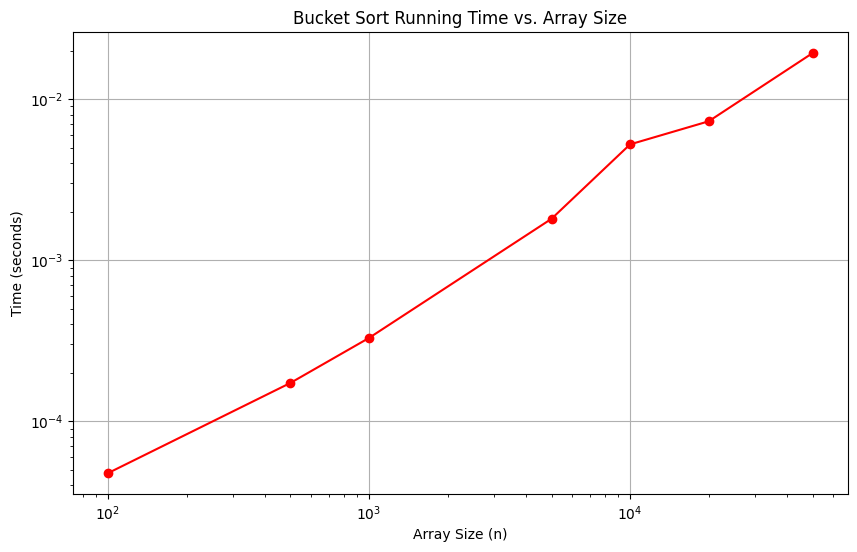

In [3]:
import time
import matplotlib.pyplot as plt

def bucketSort(arr):
    if not arr:
        return []


    max_val = max(arr) if arr else 0
    if max_val == 0:
        return arr


    num_buckets = 10
    buckets = [[] for _ in range(num_buckets)]

    for num in arr:

        index_b = min(num // ((max_val // num_buckets) + 1), num_buckets - 1)
        buckets[index_b].append(num)

    sorted_arr = []
    for bucket in buckets:

        bucket.sort()
        sorted_arr.extend(bucket)
    return sorted_arr

sample_input_bucket = [8,5,3,1,9,6,0,7,4,2,5]
print(f"Original Array for Bucket Sort: {sample_input_bucket}")
sorted_sample_bucket = bucketSort(sample_input_bucket)
print(f"Sorted Array for Bucket Sort: {sorted_sample_bucket}")

def measure_time(func, arr):
    start_time = time.time()
    func(arr)
    end_time = time.time()
    return end_time - start_time

def generate_test_array(size, max_val):
    import random
    return [random.randint(0, max_val) for _ in range(size)]

sizes = [100, 500, 1000, 5000, 10000, 20000, 50000]
max_k_value = 1000
times_bucket = []

print("\nMeasuring running time for Bucket Sort...")
for size in sizes:
    test_arr = generate_test_array(size, max_k_value)
    time_taken = measure_time(bucketSort, test_arr)
    times_bucket.append(time_taken)
    print(f"Array Size: {size}, Time: {time_taken:.6f} seconds")


plt.figure(figsize=(10, 6))
plt.plot(sizes, times_bucket, marker='o', linestyle='-', color='r')
plt.title('Bucket Sort Running Time vs. Array Size')
plt.xlabel('Array Size (n)')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.show()

**Radix sort**
Statement:Given a disordered list of integers, rearrange them in natural order.
Sample Input: [18,5,100,3,1,19,6,0,7,4,2]
Sample Output: [0,1,2,3,4,5,6,7,18,19,100]
Time Complexity of Solution:Best Case O(kn); Average Case O(kn); Worst Case O(kn),where k is the length of the longest number and n is the size of the input array.Note: if k is greater than log(n) then an nlog(n) algorithm would be a better fit. In reality we can always change the radix to make k less than log(n).
- Approach: radix sort, like counting sort and bucket sort, is an integer based algorithm (i.e. the values of the input array are assumed to be integers). Hence radix sort is among the fastest sorting algorithms around, in theory. The particular distinction for radix sort is that it creates a bucket for each cipher (i.e. digit); as such, similar to bucket sort, each bucket in radix sort must be a
growable list that may admit different keys. For decimal values, the number of buckets is 10, as the decimal system has 10 numerals/cyphers (i.e. 0,1,2,3,4,5,6,7,8,9). Then the keys are continuously sorted by significant digits.

Original Array for Radix Sort: [18, 5, 100, 3, 1, 19, 6, 0, 7, 4, 2]
Sorted Array for Radix Sort: [0, 1, 2, 3, 4, 5, 6, 7, 18, 19, 100]

Measuring running time for Radix Sort...
Array Size: 100, Time: 0.000144 seconds
Array Size: 500, Time: 0.001087 seconds
Array Size: 1000, Time: 0.001315 seconds
Array Size: 5000, Time: 0.008513 seconds
Array Size: 10000, Time: 0.019396 seconds
Array Size: 20000, Time: 0.033727 seconds
Array Size: 50000, Time: 0.108006 seconds


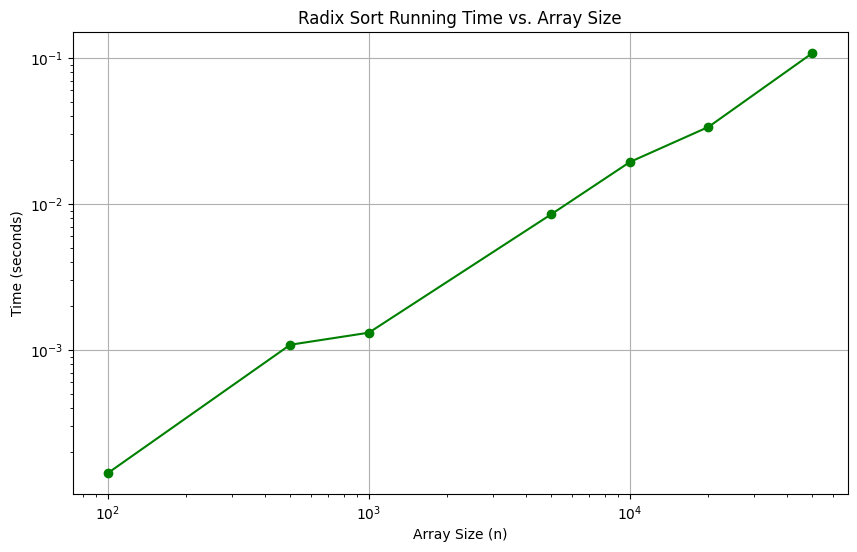

In [4]:
import time
import matplotlib.pyplot as plt

def countingSort_for_radix(arr, exp):
    n = len(arr)
    output = [0] * n
    count = [0] * 10

    for i in range(n):
        index = arr[i] // exp
        count[index % 10] += 1

    for i in range(1, 10):
        count[i] += count[i - 1]

    i = n - 1
    while i >= 0:
        index = arr[i] // exp
        output[count[index % 10] - 1] = arr[i]
        count[index % 10] -= 1
        i -= 1


    for i in range(n):
        arr[i] = output[i]

def radixSort(arr):
    if not arr:
        return []


    max_val = max(arr)


    exp = 1
    while max_val // exp > 0:
        countingSort_for_radix(arr, exp)
        exp *= 10
    return arr

sample_input_radix = [18, 5, 100, 3, 1, 19, 6, 0, 7, 4, 2]
original_sample_radix = list(sample_input_radix)
print(f"Original Array for Radix Sort: {original_sample_radix}")
sorted_sample_radix = radixSort(sample_input_radix)
print(f"Sorted Array for Radix Sort: {sorted_sample_radix}")

def measure_time(func, arr):
    start_time = time.time()
    func(arr)
    end_time = time.time()
    return end_time - start_time

def generate_test_array(size, max_val):
    import random
    return [random.randint(0, max_val) for _ in range(size)]

sizes = [100, 500, 1000, 5000, 10000, 20000, 50000]
max_k_value = 10000
times_radix = []

print("\nMeasuring running time for Radix Sort...")
for size in sizes:
    test_arr = generate_test_array(size, max_k_value)

    time_taken = measure_time(radixSort, list(test_arr))
    times_radix.append(time_taken)
    print(f"Array Size: {size}, Time: {time_taken:.6f} seconds")

plt.figure(figsize=(10, 6))
plt.plot(sizes, times_radix, marker='o', linestyle='-', color='g')
plt.title('Radix Sort Running Time vs. Array Size')
plt.xlabel('Array Size (n)')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.show()